In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
column_names = ["par_id", "keyword", "country","text", "label"]
data = pd.read_csv('Data/dontpatronizeme_pcl.tsv', sep='\t', names=column_names ,index_col="par_id", skiprows=4, usecols=[0, 2, 3, 4, 5])

data["original_label"] = data["label"]
data["label"] = data["label"].apply(lambda x: "PCL" if x > 1.5 else "No PCL")
data["length"] = data["text"].apply(lambda x: len(str(x).split()))

In [3]:
data.head()

,keyword,country,text,label,original_label,length
par_id,,,,,,
1,hopeless,ph,"We 're living in times of absolute insanity , ...",No PCL,0,123
2,migrant,gh,"In Libya today , there are countless number of...",No PCL,0,41
3,immigrant,ie,White House press secretary Sean Spicer said t...,No PCL,0,27
4,disabled,nz,Council customers only signs would be displaye...,No PCL,0,30
5,refugee,ca,""" Just like we received migrants fleeing El Sa...",No PCL,0,53


In [4]:
sorted_data = data[data["original_label"] == 3].sort_values(by="text", key=lambda x: x.str.len())
for i in range(0, 5):
    print(sorted_data["text"].iloc[i])

A new generation of the hopeless .
He wants more done now to help those in need .
Pharrell Williams thinks women can save the world .
Hospitals fill as Rohingya refugees shiver through winter
Mother of three on the brink of being homeless again <h> by


<Axes: title={'center': 'PCL vs No-PCL Frequency'}, xlabel='Label', ylabel='Number of instances'>

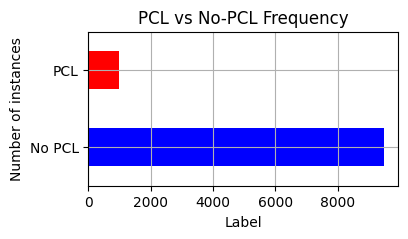

In [5]:
plt.figure(figsize=(4, 2))  # You can change these values as per your requirement
data["label"].value_counts().plot(kind='barh', title='PCL vs No-PCL Frequency', color=['blue', 'red'], ylabel='Number of instances', xlabel='Label', grid=True)

47.0
42.0


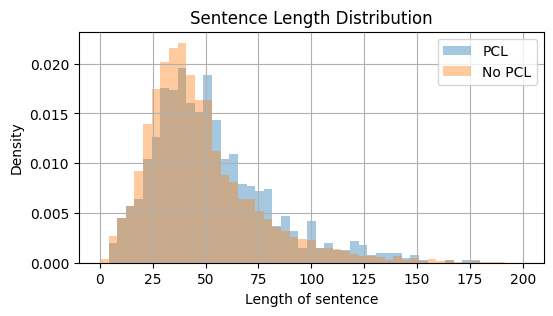

In [6]:
bins = np.linspace(0, 200, 50)
plt.figure(figsize=(6, 3))

plt.hist(data[data["label"] == "PCL"]["length"], bins=bins, alpha=0.4, density=True, label="PCL")
plt.hist(data[data["label"] == "No PCL"]["length"], bins=bins, alpha=0.4, density=True, label="No PCL")
plt.legend(loc='upper right')
plt.title("Sentence Length Distribution")
plt.xlabel("Length of sentence")
plt.ylabel("Density")
plt.grid()

pcl_median = data[data["label"] == "PCL"]["length"].median()
no_pcl_median = data[data["label"] == "No PCL"]["length"].median()
print(pcl_median)
print(no_pcl_median)

In [7]:
column_names = ["par_id", "keyword", "country", "text", "label"]
data = pd.read_csv('Data/dontpatronizeme_pcl.tsv', sep='\t', names=column_names ,index_col="par_id", skiprows=4, usecols=[0, 2, 3, 4, 5])

data["length"] = data["text"].apply(lambda x: len(str(x).split()))

# filter data by PCL or no PCL
no_pcl_data = data[data["label"].isin([0, 1])]
pcl_data = data[data["label"].isin([2, 3, 4])]


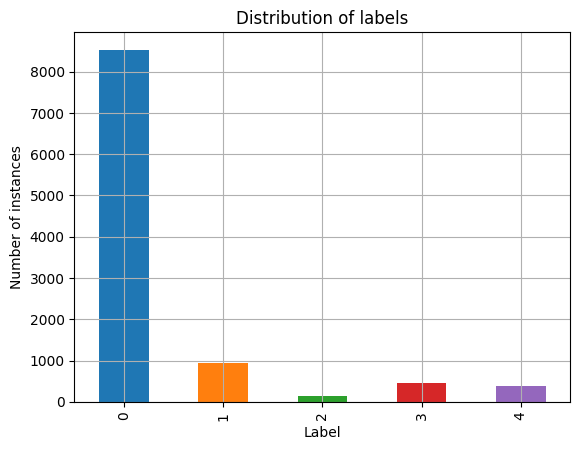

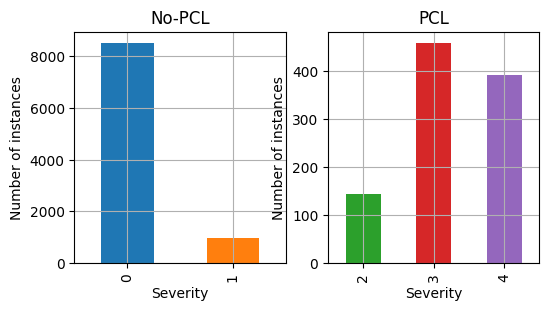

In [29]:
data["label"].value_counts().sort_index().plot(kind='bar', title='Distribution of labels', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'], ylabel='Number of instances', xlabel='Label', grid=True)
plt.show()

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 2, figsize=(6, 3))  # 1 row, 2 columns, and you can adjust the figure size

# Plot for Non-PCL and PCL data as subplots
no_pcl_data["label"].value_counts().sort_index().plot(kind='bar', ax=axs[0], title='No-PCL', color=['#1f77b4', '#ff7f0e'], ylabel='Number of instances', xlabel='Severity', grid=True)
pcl_data["label"].value_counts().sort_index().plot(kind='bar', ax=axs[1], title='PCL', color=['#2ca02c', '#d62728', '#9467bd'], ylabel='Number of instances', xlabel='Severity', grid=True)
plt.show()

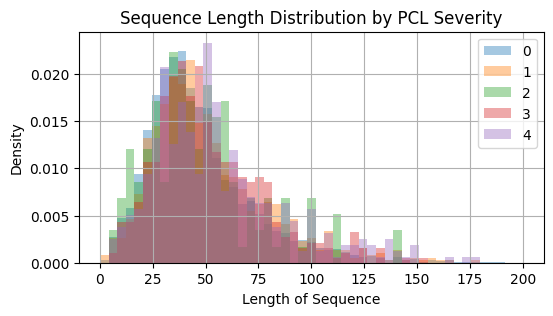

In [24]:
bins = np.linspace(0, 200, 50)
plt.figure(figsize=(6, 3))

plt.hist(data[data["label"] == 0]["length"], bins=bins, alpha=0.4, density=True, label="0")
plt.hist(data[data["label"] == 1]["length"], bins=bins, alpha=0.4, density=True, label="1")
plt.hist(data[data["label"] == 2]["length"], bins=bins, alpha=0.4, density=True, label="2")
plt.hist(data[data["label"] == 3]["length"], bins=bins, alpha=0.4, density=True, label="3")
plt.hist(data[data["label"] == 4]["length"], bins=bins, alpha=0.4, density=True, label="4")
plt.legend(loc='upper right')
plt.title("Sequence Length Distribution by PCL Severity")
plt.xlabel("Length of Sequence")
plt.ylabel("Density")
plt.grid()

# Keyword Stats

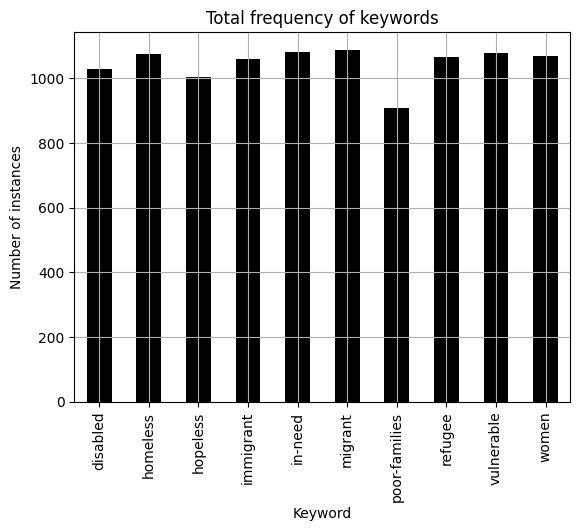

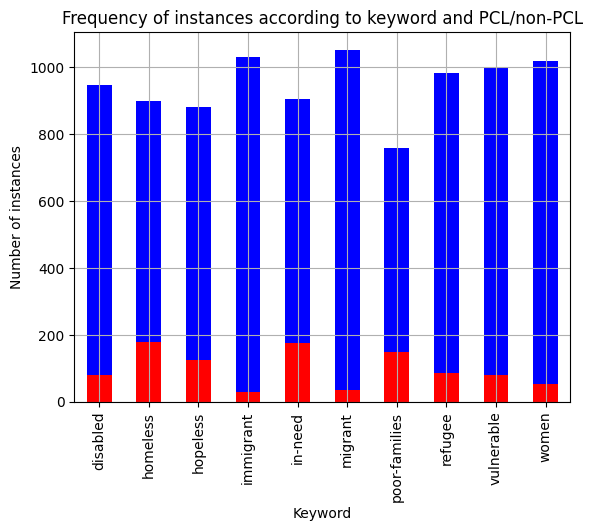

<class 'pandas.core.series.Series'>
keyword
disabled         11.691358
homeless          5.050562
hopeless          7.104839
immigrant        34.366667
in-need           5.147727
migrant          29.250000
poor-families     5.060000
refugee          11.418605
vulnerable       12.500000
women            19.576923
Name: count, dtype: float64
<class 'pandas.core.series.Series'>
keyword
disabled         0.078794
homeless         0.165274
hopeless         0.123383
immigrant        0.028275
in-need          0.162662
migrant          0.033058
poor-families    0.165017
refugee          0.080524
vulnerable       0.074074
women            0.048598
Name: count, dtype: float64


<Axes: title={'center': 'PCL Distribution by Keyword (Category)'}, xlabel='Keyword', ylabel='Instances containing PCL'>

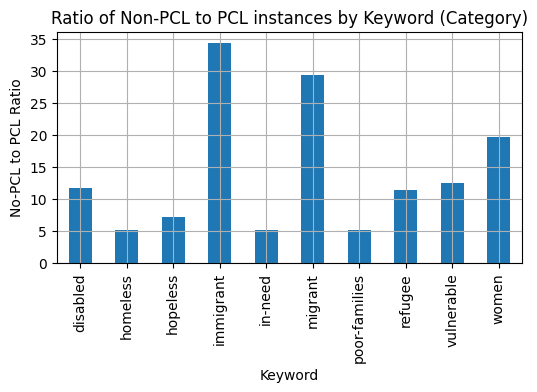

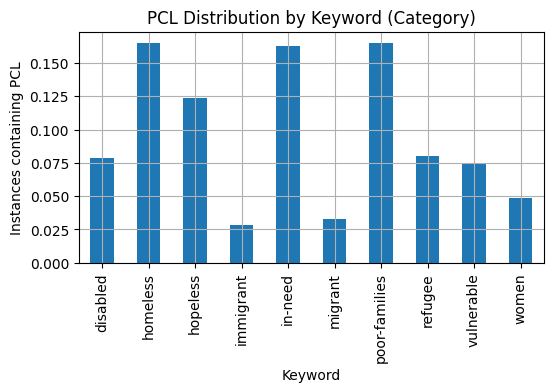

In [22]:
# plot total frequency of keywords 
data["keyword"].value_counts().sort_index().plot(kind='bar', title='Total frequency of keywords', color=['black'], ylabel='Number of instances', xlabel='Keyword', grid=True)
plt.show()

# plot frequency of keywords categorised by PCL or Non-PCL
no_pcl_data["keyword"].value_counts().sort_index().plot(kind='bar', title='Frequency of instances according to keyword and PCL/non-PCL', color=['blue'], ylabel='Number of instances', xlabel='Keyword', grid=True)
pcl_data["keyword"].value_counts().sort_index().plot(kind='bar', title='Frequency of instances according to keyword and PCL/non-PCL', color=['red'], ylabel='Number of instances', xlabel='Keyword', grid=True)
plt.show()

# Calculate non-PCL to PCL ratios for all keyword categories
plt.figure(figsize=(6, 3))
ratios = no_pcl_data["keyword"].value_counts().sort_index() / pcl_data["keyword"].value_counts().sort_index()
print(type(ratios))
print(ratios)
ratios.plot(kind='bar', title='Ratio of Non-PCL to PCL instances by Keyword (Category)', color=['#1f77b4'], ylabel='No-PCL to PCL Ratio', xlabel='Keyword', grid=True)

# Calculate non-PCL to PCL ratios for all keyword categories
plt.figure(figsize=(6, 3))
ratios = pcl_data["keyword"].value_counts().sort_index() / (pcl_data["keyword"].value_counts().sort_index() + no_pcl_data["keyword"].value_counts().sort_index())
print(type(ratios))
print(ratios)
ratios.plot(kind='bar', title='PCL Distribution by Keyword (Category)', color=['#1f77b4'], ylabel='Instances containing PCL', xlabel='Keyword', grid=True)

# Country Stats

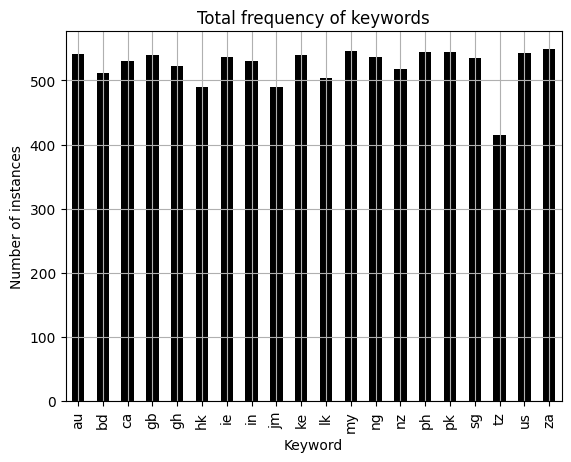

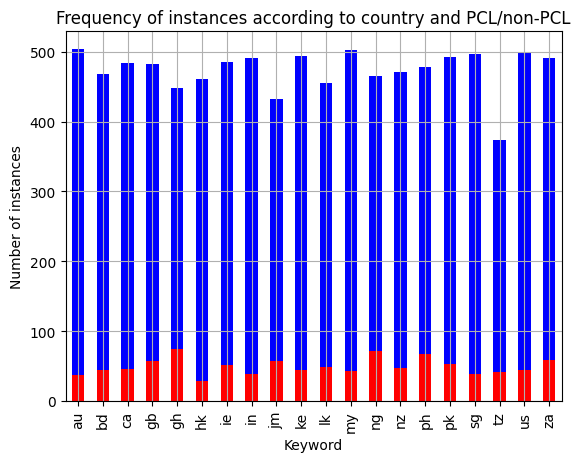

<class 'pandas.core.series.Series'>
country
au    13.621622
bd    10.636364
ca    10.521739
gb     8.473684
gh     5.973333
hk    15.896552
ie     9.326923
in    12.589744
jm     7.596491
ke    10.977778
lk     9.285714
my    11.697674
ng     6.458333
nz    10.021277
ph     7.134328
pk     9.283019
sg    13.078947
tz     9.121951
us    11.340909
za     8.465517
Name: count, dtype: float64


<Axes: title={'center': 'Ratio of Non-PCL to PCL instances by Country'}, xlabel='Country', ylabel='Ratio'>

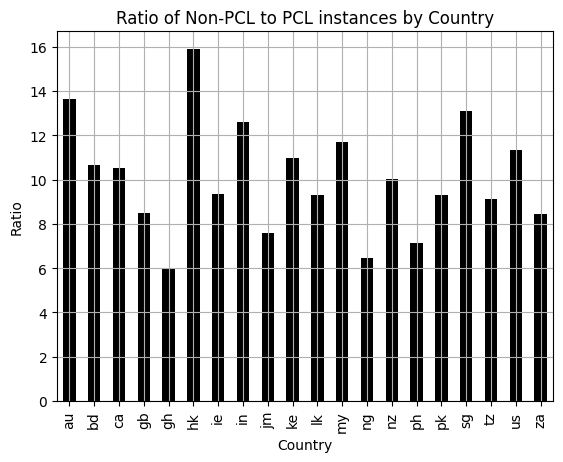

In [11]:
# plot total frequency of keywords 
data["country"].value_counts().sort_index().plot(kind='bar', title='Total frequency of keywords', color=['black'], ylabel='Number of instances', xlabel='Keyword', grid=True)
plt.show()

# plot frequency of keywords categorised by PCL or Non-PCL
no_pcl_data["country"].value_counts().sort_index().plot(kind='bar', title='Frequency of instances according to country and PCL/non-PCL', color=['blue'], ylabel='Number of instances', xlabel='Keyword', grid=True)
pcl_data["country"].value_counts().sort_index().plot(kind='bar', title='Frequency of instances according to country and PCL/non-PCL', color=['red'], ylabel='Number of instances', xlabel='Keyword', grid=True)
plt.show()

# Calculate non-PCL to PCL ratios for all keyword categories
ratios = no_pcl_data["country"].value_counts().sort_index() / pcl_data["country"].value_counts().sort_index()
print(type(ratios))
print(ratios)
ratios.plot(kind='bar', title='Ratio of Non-PCL to PCL instances by Country', color=['black'], ylabel='Ratio', xlabel='Country', grid=True)